# Import dependencies and clean data

In [1]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\kirst\appdata\local\continuum\anaconda3\lib\site-packages (0.7.0)


In [2]:
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('germanHeaders.csv', header=None)

In [4]:
columns = data.iloc[0].tolist()

In [5]:
data.columns = columns
columns

[nan,
 'account_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_account',
 'unemployed',
 'installment_rate',
 'personal_status_sex',
 'debtors/guarantors',
 'present_residence_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits',
 'job',
 'liable_for',
 'telephone',
 'foreign_worker',
 'good/bad']

In [6]:
data = data.iloc[1:]
data

,NaN,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
1,0.0,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,1.0,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,2.0,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,3.0,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
5,4.0,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,995.0,A14,12,A32,A42,1736,A61,A74,3,A92,...,A121,31,A143,A152,1,A172,1,A191,A201,1
997,996.0,A11,30,A32,A41,3857,A61,A73,4,A91,...,A122,40,A143,A152,1,A174,1,A192,A201,1
998,997.0,A14,12,A32,A43,804,A61,A75,4,A93,...,A123,38,A143,A152,1,A173,1,A191,A201,1
999,998.0,A11,45,A32,A43,1845,A61,A73,4,A93,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [7]:
data = data.iloc[:,1:]
data

,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,debtors/guarantors,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
997,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
998,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
999,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [8]:
data.columns.tolist()

['account_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_account',
 'unemployed',
 'installment_rate',
 'personal_status_sex',
 'debtors/guarantors',
 'present_residence_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits',
 'job',
 'liable_for',
 'telephone',
 'foreign_worker',
 'good/bad']

In [9]:
data

,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,debtors/guarantors,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
997,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
998,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
999,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [10]:
data = data.replace({'A':''}, regex=True)
data['good/bad'] = data['good/bad'].replace({'2':'0'}, regex=True)

In [11]:
data = data.apply(pd.to_numeric) 
#data

In [12]:
#data.dtypes

In [13]:
#data.to_csv('cleandata_woutcome.csv')

# Assign variables, sample, scale

In [14]:
X = data.drop("good/bad", axis=1)
y = data["good/bad"]
attribute_names = X.columns
#X.head()

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1)

In [17]:
y_train.value_counts()

0    527
1    523
Name: good/bad, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print('Test Acc: %.3f' % model.score(X_test,y_test))

Test Acc: 0.714


In [21]:
predictions = model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

print (classification_report(y_test, predictions,
                            target_names=["bad","good"]))

              precision    recall  f1-score   support

         bad       0.70      0.75      0.72       173
        good       0.73      0.68      0.71       177

    accuracy                           0.71       350
   macro avg       0.72      0.71      0.71       350
weighted avg       0.72      0.71      0.71       350



# GridSearch

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10],
             'gamma': [0.001, 0.01, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [24]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.719, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.724, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.724, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.781, total=   0.0s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.733, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.719, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.724, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.724, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.781, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.733, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.719, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.1s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.01]},
             verbose=3)

In [25]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.001}
0.7361904761904762


In [26]:
predictions = grid.predict(X_test)

In [27]:
print (classification_report(y_test, predictions,
                            target_names=["bad","good"]))

              precision    recall  f1-score   support

         bad       0.70      0.75      0.72       173
        good       0.73      0.68      0.71       177

    accuracy                           0.71       350
   macro avg       0.72      0.71      0.71       350
weighted avg       0.72      0.71      0.71       350



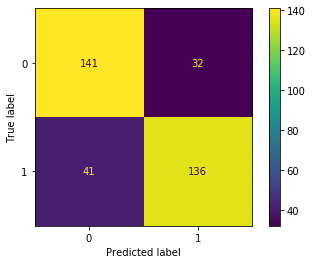

In [29]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt

clf = SVC(random_state=1)
clf.fit(X_train, y_train)
SVC(random_state=1)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()